<div style="display: flex; background-color: #3F579F;">
    <h1 style="margin: auto; font-weight: bold; padding: 30px 30px 0px 30px;" align="center">Consumption needs of buildings - Project 4</h1>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 5px 30px 0px 30px;" >
    <h2 style="width: 100%; text-align: center; float: left;" align="center">| Modeling notebook |</h2>
</div>
<div style="display: flex; background-color: #3F579F; margin: auto; padding: 10px 30px 30px 30px;">
    <h3 style="width: 100%; text-align: center; font-size:26px; float: left;" align="center">Data Scientist course - OpenClassrooms</h3>
</div>

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">1. Libraries and functions</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">1.1. Libraries and functions</h3>
</div>

In [1]:
## df_analysis
import io
import gc
import timeit
import math
from math import prod

## General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Scikit Learn library
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

%matplotlib inline

sns.set_theme(style="darkgrid")

SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
SUP = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">1.2. Functions declaration</h4>
</div>

In [2]:
def df_analysis(df, name_df, *args, **kwargs):
    """
    Method used to analyze on the DataFrame.

    Parameters:
    -----------------
        df (pandas.DataFrame): Dataset to analyze
        name_df (str): Dataset name
        
        *args, **kwargs:
        -----------------
            columns (list): Dataframe keys in list format
            flag (str): Flag to show complete information about the dataset to analyse
                        "complete" shows all information about the dataset

    Returns:
    -----------------
        None. 
        Print the analysis on the Dataset. 
    """
    
    # Getting the variables
    columns = kwargs.get("columns", None)
    type_analysis = kwargs.get("type_analysis", None)
    
    ORDERING_COMPLETE = [
        "name", "type", "records", "unique", "# NaN", "% NaN", "mean", "min", "25%", "50%", "75%", "max", "std"
    ]
    
    # Calculating the memory usage based on dataframe.info()
    buf = io.StringIO()
    df.info(buf=buf)
    memory_usage = buf.getvalue().split('\n')[-2]
    
    if df.empty:
        print("The", name_df, "dataset is empty. Please verify the file.")
    else:
        empty_cols = [col for col in df.columns if df[col].isna().all()] # identifying empty columns
        df_rows_duplicates = df[df.duplicated()] #identifying full duplicates rows
        
        # Creating a dataset based on Type object and records by columns
        type_cols = df.dtypes.apply(lambda x: x.name).to_dict() 
        df_resume = pd.DataFrame(list(type_cols.items()), columns = ["name", "type"])
        df_resume["records"] = list(df.count())
        df_resume["# NaN"] = list(df.isnull().sum())
        df_resume["% NaN"] = list(((df.isnull().sum() / len(df.index))*100).round(2))
        
        print("\nAnalysis of", name_df, "dataset")
        print("--------------------------------------------------------------------")
        print("- Dataset shape:                 ", df.shape[0], "rows and", df.shape[1], "columns")
        print("- Total of NaN values:           ", df.isna().sum().sum())
        print("- Percentage of NaN:             ", round((df.isna().sum().sum() / prod(df.shape)) * 100, 2), "%")
        print("- Total of full duplicates rows: ", df_rows_duplicates.shape[0])
        print("- Total of empty rows:           ", df.shape[0] - df.dropna(axis="rows", how="all").shape[0]) if df.dropna(axis="rows", how="all").shape[0] < df.shape[0] else \
                    print("- Total of empty rows:            0")
        print("- Total of empty columns:        ", len(empty_cols))
        print("  + The empty column is:         ", empty_cols) if len(empty_cols) == 1 else \
                    print("  + The empty column are:         ", empty_cols) if len(empty_cols) >= 1 else None
        print("- Unique indexes:                ", df.index.is_unique)
        
        if columns is not None:
            print("\n- The key(s):", columns, "is not present multiple times in the dataframe.\n  It CAN be used as a primary key.") if df.size == df.drop_duplicates(columns).size else \
                print("\n- The key(s):", columns, "is present multiple times in the dataframe.\n  It CANNOT be used as a primary key.")
        
        if type_analysis == "summarized":
            print("\n")
        
        if type_analysis is None or type_analysis != "summarized":
            pd.set_option("display.max_rows", None) # show full of showing rows
            pd.set_option("display.max_columns", None) # show full of showing cols
            pd.set_option("display.max_colwidth", None) # show full width of showing cols
            pd.set_option("display.float_format", lambda x: "%.5f" % x) # show full content in cell    
            
            if type_analysis is None or type_analysis != "complete":
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
            elif type_analysis == "complete":
                df_resume["unique"] = list(df.nunique())
                df_desc = pd.DataFrame(df.describe().T).reset_index()
                df_desc = df_desc.rename(columns={"index": "name"})
                df_resume = df_resume.merge(right=df_desc[["name", "mean", "min", "25%", "50%", "75%", "max", "std"]], on="name", how="left")
                df_resume = df_resume[ORDERING_COMPLETE]
                print("\n- Type object and records by columns      (",memory_usage,")")
                print("--------------------------------------------------------------------")
                
            display(df_resume.sort_values("records", ascending=False))
            
            pd.reset_option("display.max_rows") # reset max of showing rows
            pd.reset_option("display.max_columns") # reset max of showing cols
            pd.reset_option("display.max_colwidth") # reset width of showing cols
            pd.reset_option("display.float_format") # reset show full content in cell
            
        # deleting dataframe to free memory
        if type_analysis == "complete":
            del [[df_resume, df_desc]]
            gc.collect()
            df_resume, df_desc = (pd.DataFrame() for i in range(2))
        else:
            del df_resume
            gc.collect()
            df_resume = pd.DataFrame()

<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">2. Importing files</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">2.1. Importing and preparing files</h4>
</div>

In [3]:
data = pd.read_csv(r"datasets\df_cleaned_final.csv")

In [4]:
data.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,88434,0,88434,DOWNTOWN,Hotel,52.79951,6981428.0,249.43
1,11,1,25,103566,15064,88502,DOWNTOWN,Hotel,46.74768,8354235.0,263.51
2,41,1,52,956110,196718,759392,DOWNTOWN,Hotel,68.04593,73130656.0,2061.48
3,10,1,95,61320,0,61320,DOWNTOWN,Hotel,9.80903,28229320.0,1936.34
4,18,1,41,175580,62000,113580,DOWNTOWN,Hotel,40.90771,14829099.0,507.70


In [5]:
df_analysis(data, "data", type_analysis="complete")


Analysis of data dataset
--------------------------------------------------------------------
- Dataset shape:                  1656 rows and 11 columns
- Total of NaN values:            0
- Percentage of NaN:              0.0 %
- Total of full duplicates rows:  0
- Total of empty rows:            0
- Total of empty columns:         0
- Unique indexes:                 True

- Type object and records by columns      ( memory usage: 142.4+ KB )
--------------------------------------------------------------------


,name,type,records,unique,# NaN,% NaN,mean,min,25%,50%,75%,max,std
0,NumberofFloors,int64,1656,42,0,0.00000,4.13285,1.00000,1.00000,2.00000,4.00000,99.00000,6.53546
1,NumberofBuildings,int64,1656,11,0,0.00000,1.13164,1.00000,1.00000,1.00000,1.00000,111.00000,2.91856
2,BuildingAge,int64,1656,113,0,0.00000,59.22645,6.00000,32.00000,56.00000,91.00000,121.00000,32.65619
3,PropertyGFATotal,int64,1656,1577,0,0.00000,119192.86171,11285.00000,29398.50000,49289.50000,105070.75000,9320156.00000,298038.52446
4,PropertyGFAParking,int64,1656,326,0,0.00000,13321.64251,0.00000,0.00000,0.00000,0.00000,512608.00000,43664.74773
5,PropertyGFABuilding(s),int64,1656,1572,0,0.00000,105871.21920,3636.00000,28356.00000,47484.50000,94479.00000,9320156.00000,284529.39591
6,Neighborhood,object,1656,13,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,renamed_PropertyType,object,1656,8,0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Electricity_ratio,float64,1656,1297,0,0.00000,70.74668,0.00033,50.47055,72.26544,99.99938,100.00874,25.82563
9,SiteEnergyUse(kBtu),float64,1656,1655,0,0.00000,8563131.38206,11441.00000,1222923.50000,2512737.00000,7009066.00000,873923712.00000,30439268.96365


<div style="background-color: #506AB9;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">3. Splitting data (SiteEnergyUse(kBtu)</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.1. Splitting dataset based on the features and targets</h4>
</div>

In [6]:
data.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,88434,0,88434,DOWNTOWN,Hotel,52.79951,6981428.0,249.43
1,11,1,25,103566,15064,88502,DOWNTOWN,Hotel,46.74768,8354235.0,263.51
2,41,1,52,956110,196718,759392,DOWNTOWN,Hotel,68.04593,73130656.0,2061.48
3,10,1,95,61320,0,61320,DOWNTOWN,Hotel,9.80903,28229320.0,1936.34
4,18,1,41,175580,62000,113580,DOWNTOWN,Hotel,40.90771,14829099.0,507.70


<div class="alert alert-block alert-info">
    Working with a copy
</div>

In [7]:
data_trans = data.copy()

In [8]:
data_trans.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,88434,0,88434,DOWNTOWN,Hotel,52.79951,6981428.0,249.43
1,11,1,25,103566,15064,88502,DOWNTOWN,Hotel,46.74768,8354235.0,263.51
2,41,1,52,956110,196718,759392,DOWNTOWN,Hotel,68.04593,73130656.0,2061.48
3,10,1,95,61320,0,61320,DOWNTOWN,Hotel,9.80903,28229320.0,1936.34
4,18,1,41,175580,62000,113580,DOWNTOWN,Hotel,40.90771,14829099.0,507.70


<div class="alert alert-block alert-info">
    Making log transformation on specific columns based on the analysis conclusions done
</div>

In [9]:
LOG_TRANS_FEATURES = ["PropertyGFABuilding(s)", "PropertyGFATotal", "SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)"]

In [10]:
for col in LOG_TRANS_FEATURES:
    data_trans[col] = np.log2(data_trans[col])

In [11]:
data_trans.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio,SiteEnergyUse(kBtu),GHGEmissions(MetricTonsCO2e)
0,12,1,94,16.432314,0,16.432314,DOWNTOWN,Hotel,52.79951,22.735091,7.962491
1,11,1,25,16.660191,15064,16.433422,DOWNTOWN,Hotel,46.74768,22.994076,8.041714
2,41,1,52,19.866817,196718,19.534485,DOWNTOWN,Hotel,68.04593,26.123973,11.009465
3,10,1,95,15.904070,0,15.904070,DOWNTOWN,Hotel,9.80903,24.750691,10.919117
4,18,1,41,17.421769,62000,16.793349,DOWNTOWN,Hotel,40.90771,23.821928,8.987832


<div class="alert alert-block alert-info">
    Splitting dataset based on the features and targets
</div>

In [12]:
X = data_trans.drop(columns=["SiteEnergyUse(kBtu)", "GHGEmissions(MetricTonsCO2e)"])

In [13]:
y_energy = data_trans.iloc[:,-2]

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2. Train/Test split</h4>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>SiteEnergyUse(kBtu)</b>
</div>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.3, random_state=0)

In [15]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

X_train: (1159, 9)
y_train: (1159,)


In [16]:
X_train.head()

,NumberofFloors,NumberofBuildings,BuildingAge,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),Neighborhood,renamed_PropertyType,Electricity_ratio
593,2,1,55,16.908299,0,16.908299,GREATER DUWAMISH,Warehouse,100.00416
930,1,1,46,14.779617,0,14.779617,GREATER DUWAMISH,Warehouse,68.93000
838,3,1,103,15.219320,0,15.219320,DOWNTOWN,Office,100.00415
649,3,1,79,15.979916,0,15.979916,DOWNTOWN,Office,56.61121
529,5,1,23,16.754000,0,16.754000,MAGNOLIA / QUEEN ANNE,Office,100.00414


<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3. Identifying types of features</h4>
</div>

In [17]:
NUMERICAL_FEATURES = ["NumberofFloors", "NumberofBuildings", "BuildingAge", "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)", "Electricity_ratio"]
CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"]

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
     We are going to process the features as follows<br><br>
    <b>Numerical features</b>
    <ul style="list-style-type: square;">
        <li>Normalizing the features through StandardScaler due to all of them do not have a normal distribution</li>
    </ul> 
    <b>Categorical features</b>
    <ul style="list-style-type: square;">
        <li>Transforming all features through LabelEncoder</li>
    </ul>  
</div>

In [18]:
numerical_pipeline = make_pipeline(StandardScaler())

categorical_pipeline = make_pipeline(OneHotEncoder())

In [19]:
preprocessor = make_column_transformer(
                (numerical_pipeline, NUMERICAL_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES))

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5. Modelisation</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.1. Supervised models</h4>
</div>

<div class="alert alert-block alert-info">
    List of models to use. for now, in default mode
</div>

In [20]:
regressors = {
    "KNeighbors" : KNeighborsRegressor(n_neighbors=2),
    "Linear" : LinearRegression(),
    "Lasso" : Lasso(),
    "Random Forest" : RandomForestRegressor(),
    "SVR" : SVR(),
    "Gradient Boosting" : GradientBoostingRegressor()
}

<div class="alert alert-block alert-info">
    Models metrics
</div>

In [21]:
# Dataframe with y_test_transformed to compared againts predictions
df_y_pred = pd.DataFrame({
        "Model" : "Original",
        "y_pred" : y_test
})

# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION  = ([] for i in range(5))

for k, v in regressors.items():
    
    start_time_model = timeit.default_timer()
    
    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    # Fit the model using the training data and training target
    reg.fit(X_train, y_train)
    
    # Making the prediction using the testing data
    y_pred = reg.predict(X_test)
    
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    # Concatenating predictions to compare against y_test_transformed
    df_temp = pd.DataFrame({
        "Model" : k,
        "y_pred" : y_pred
    })
    
    # Concatenating predictions to compare against y_test_transformed
    df_y_pred = pd.concat([df_y_pred, df_temp])
    
    # Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
    R2SCORE = round(r2_score(y_test, y_pred), 3)
    
    # Calculating the Mean absolute error (The best value is 0.0)
    MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
    # Calculating Root Mean Square Error for each model (The best value is 0.0)
    RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_MAE.append(MAE)
    LIST_RMSE.append(RMSE)
    LIST_R2SCORE.append(R2SCORE)
    LIST_DURATION.append(end_time_model)

<div class="alert alert-block alert-info">
    Comparison of energy predictions against original data
</div>

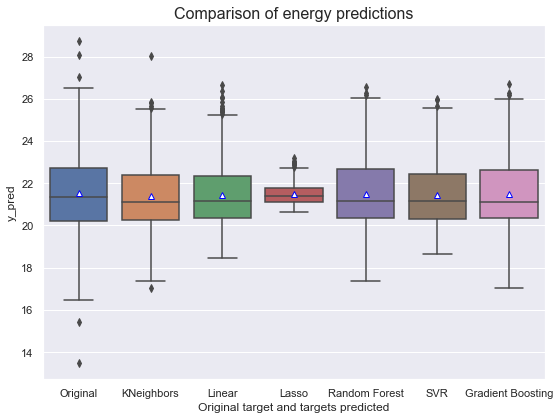

In [22]:
plt.figure(figsize=[8,6])
sns.boxplot(x=df_y_pred["Model"], y=df_y_pred["y_pred"], showmeans=True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title("Comparison of energy predictions", size=16)
plt.xlabel("Original target and targets predicted", size=12)
plt.tight_layout()
plt.savefig("img/Comparison-of-imputations.png")
plt.show()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.2. Predictions metrics</h4>
</div>

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [23]:
df_models_metrics = pd.DataFrame({
    "Model" : LIST_MODEL,
    "R2".translate(SUP) : LIST_R2SCORE, 
    "MAE" : LIST_MAE,    
    "RMSE" : LIST_RMSE,
    "Duration" : LIST_DURATION,
})

df_models_metrics

,Model,R²,MAE,RMSE,Duration
0,KNeighbors,0.526,0.953,1.334,0.046
1,Linear,0.683,0.795,1.091,0.029
2,Lasso,0.312,1.232,1.606,0.018
3,Random Forest,0.708,0.779,1.046,0.721
4,SVR,0.679,0.778,1.097,0.120
5,Gradient Boosting,0.732,0.760,1.003,0.218


<div class="alert alert-block alert-success">
    <b>Best results</b> with default mode considering each model
    <ul style="list-style-type: square;">
        <li><b>r2:</b> Gradient Boosting(0.732) </li>
        <li><b>MAE:</b> Gradient Boosting(0.759) </li>
        <li><b>RMSE:</b> Gradient Boosting(1.003) </li>
        <li><b>Duration:</b> Lasso(0.010) </li>
    </ul> 
</div>

In [24]:
df_models_metrics_melt = pd.melt(df_models_metrics, id_vars="Model", var_name="Metric", value_name="Value")
df_models_metrics_melt.head()

,Model,Metric,Value
0,KNeighbors,R²,0.526
1,Linear,R²,0.683
2,Lasso,R²,0.312
3,Random Forest,R²,0.708
4,SVR,R²,0.679


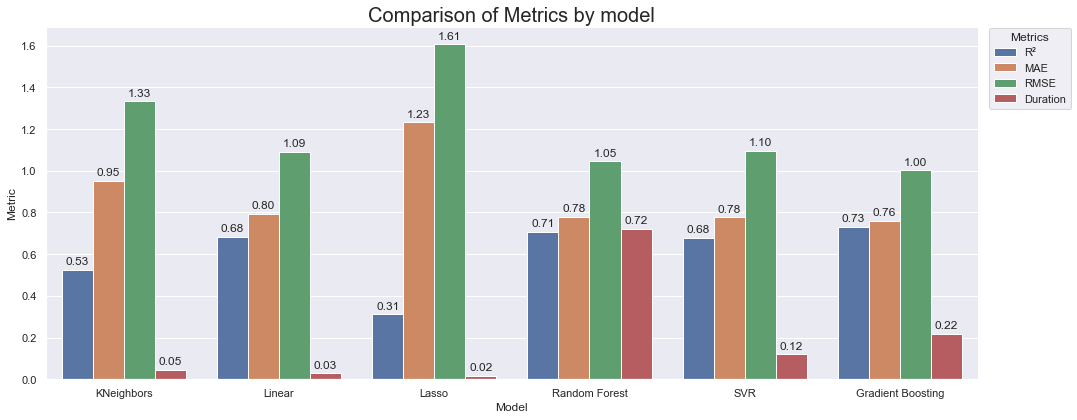

In [25]:
fig, ax1 = plt.subplots(figsize=(15, 6))
plot = sns.barplot(x="Model", y="Value", hue="Metric", data=df_models_metrics_melt, ax=ax1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), ".2f"), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha="center", va="center", xytext=(0, 8), textcoords="offset points")
plt.title("Comparison of Metrics by model", size=20)
plt.legend(bbox_to_anchor=(1.10, 1), borderaxespad=0, title="Metrics")
plt.tight_layout()
plt.xlabel("Model", size=12)
plt.ylabel("Metric", size=12)
plt.savefig("img/comparisonMetricsByModel.png")
sns.despine(fig)

<div class="alert alert-block alert-danger">
    <b>Flago position</b>
</div>

In [26]:
XXXXXXXXX

NameError: name 'XXXXXXXXX' is not defined

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.3. Cross Validation</h4>
</div>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

<div class="alert alert-block alert-info">
    We are going to implement the Cross Validation and then, compare with the previous results
</div>

In [ ]:
df_y_pred["Description"] = "Initial"
df_y_pred.loc[df_y_pred["Model"] == "Original", "Description"] = "Original"


In [ ]:
df_models_metrics["Description"] = "Initial"
df_models_metrics.head(5)

In [ ]:
# Dataframe with y_test_transformed to compared againts predictions
df_y_pred_cross_validation = pd.DataFrame() 

# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION  = ([] for i in range(5))

for k, v in regressors.items():
    print(k)
    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    
    # Get the score for each validation score method to get accuracy of model
    scores = cross_val_score(reg, X_train, y_train, cv=kfold, scoring=["r2", "neg_mean_absolute_error", "neg_mean_squared_error"])
#     R2SCORE = np.mean(scores)
    
#     # Get the Mean absolute error for each validation
#     maes = cross_val_score(reg, X_train, y_train, cv=kfold, scoring="neg_mean_absolute_error", "neg_mean_squared_error")
#     MAE = np.mean(maes)
    
#     # Get the Root Mean Square Error each validation
#     mses = cross_val_score(reg, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
#     RMSE = np.mean(mses)
#     print("RMSE",RMSE)
#     RMSE =  math.sqrt(RMSE)
   
    
    
    
    
    
#     R2SCORE = cross_val_score(reg, X_train, y_train, cv=kfold, scoring="r2")
#     print(R2SCORE)
#     scores = cross_val_score(reg, X_train, y_train, cv=kfold)
#     print(scores)
#     print("---")
#     # Get the mean of the scores
#     score = np.mean(scores)

In [ ]:
  
    

    
# List of metrics results for each models 
LIST_MODEL, LIST_R2SCORE, LIST_MAE, LIST_RMSE, LIST_DURATION  = ([] for i in range(5))

for k, v in regressors.items():
    
    start_time_model = timeit.default_timer()
    
    # Data preprocessing based on the pipelines and the regressors setup
    reg = make_pipeline(preprocessor, v)
    
    # Fit the model using the training data and training target
    reg.fit(X_train, y_train)
    
    # Making the prediction using the testing data
    y_pred = reg.predict(X_test)
    
    end_time_model =  round(timeit.default_timer() - start_time_model, 3)
    
    # Concatenating predictions to compare against y_test_transformed
    df_temp = pd.DataFrame({
        "Model" : k,
        "y_pred" : y_pred
    })
    
    # Concatenating predictions to compare against y_test_transformed
    df_y_pred = pd.concat([df_y_pred, df_temp])
    
    # Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
    R2SCORE = round(r2_score(y_test, y_pred), 3)
    
    # Calculating the Mean absolute error (The best value is 0.0)
    MAE = round(mean_absolute_error(y_test, y_pred), 3)
    
    # Calculating Root Mean Square Error for each model (The best value is 0.0)
    RMSE = round(mean_squared_error(y_test, y_pred, squared=False), 3)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_MAE.append(MAE)
    LIST_RMSE.append(RMSE)
    LIST_R2SCORE.append(R2SCORE)
    LIST_DURATION.append(end_time_model)

In [ ]:
LIST_SCORES

In [ ]:
df_models_metrics = pd.DataFrame({
    "Model" : LIST_MODEL,
    "Score" : LIST_SCORE,

})

df_models_metrics

In [ ]:
- dibujar linear con crossvalidaation
- comparar con modo default
-- pasar a optimización

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5. Optimization</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">XXXXXXXXXXXXXXXXXXXXXXXXXXXXX</h1>
</div>

- grafica de error de training vs error test
https://scikit-learn.org/stable/auto_examples/model_selection/plot_train_error_vs_test_error.html

- plotting learning curves
https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
https://scikit-learn.org/stable/modules/learning_curve.html

- Visualizaciones
https://scikit-learn.org/stable/visualizations.html
https://medium.datadriveninvestor.com/visualizing-scikit-model-performance-fb26ff16f7c6


- lsitado de metricas
https://scikit-learn.org/stable/modules/model_evaluation.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Receiver Operating Characteristic (ROC) with cross validation
https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

- Underfitting vs. Overfitting
https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html#sphx-glr-auto-examples-model-selection-plot-underfitting-overfitting-py

- Plotting Cross-Validated Predictions
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.htmlPlotting

<div class="alert alert-block alert-danger">
    <b>Flago position</b>
</div>

In [ ]:
XXXXXXXXX

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.2. Train/Test split</h4>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>SiteEnergyUse(kBtu)</b>
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.3, random_state=0)

In [ ]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

In [ ]:
X_train.head()

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">3.3. Identifying types of features</h4>
</div>

In [ ]:
NUMERICAL_FEATURES = ["NumberofFloors", "NumberofBuildings", "BuildingAge", "PropertyGFATotal", "PropertyGFAParking", "PropertyGFABuilding(s)"]
CATEGORICAL_FEATURES = ["Neighborhood", "renamed_PropertyType"]

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4. Data preprocessing</h3>
</div>

<div class="alert alert-block alert-info">
     We are going to process the features as follows<br><br>
    <b>Numerical features</b>
    <ul style="list-style-type: square;">
        <li>Transforming all features to log due to all of them do not have a normal distribution</li>
        <li>Normalizing the features through StandardScaler due to all of them do not have a normal distribution</li>
    </ul> 
    <b>Categorical features</b>
    <ul style="list-style-type: square;">
        <li>Transforming all features through OneHotEncoder</li>
    </ul>  
</div>

In [ ]:
log_trans_pipeline = make_pipeline(FunctionTransformer(np.log2))

numerical_pipeline = make_pipeline(StandardScaler())

categorical_pipeline = make_pipeline(LabelEncoder())

In [ ]:
preprocessor = make_column_transformer(
                (log_trans_pipeline, LOG_TRANS_FEATURES),
                (numerical_pipeline, NUMERICAL_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES))

<div class="alert alert-block alert-info">
    Log transformation of target variable based on the analysis done
</div>

In [ ]:
y_train_transformed = y_train.apply(np.log1p)

In [ ]:
y_test_transformed = y_test.apply(np.log1p)

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">5. Modelisation</h3>
</div>

<div class="alert alert-block alert-info">
    List of models to use
</div>

In [ ]:
regressors = {
    "KNeighbors" : KNeighborsRegressor(n_neighbors=2),
    "Linear" : LinearRegression(),
    "Lasso" : Lasso(alpha=1e-4),
    "Random Forest" : RandomForestRegressor(),
    "AdaBoostRegressor" : BaggingRegressor(),
    "Gradient Boosting" : GradientBoostingRegressor(n_estimators=100, random_state=0)
    
    "Poisson" : PoissonRegressor(),
    "Ridge" : Ridge(),
    
    
    "SVR" : SVR(kernel="rbf", gamma="auto", C=8),
    "Elastic Net" : ElasticNet(),
    "Bagging" : BaggingRegressor(),
    "AdaBoostRegressor" : BaggingRegressor(),
    "Extra Tree" : ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
    "Gradient Boosting" : GradientBoostingRegressor(n_estimators=100, random_state=0)
}

<div class="alert alert-block alert-info">
    Models metrics
</div>

In [ ]:
# Dataframe with y_test_transformed to compared againts predictions
df_y_pred = pd.DataFrame({
        "Model" : "Original",
        "y_pred" : y_test_transformed
})

# List of metrics results for each models 
LIST_MODEL, LIST_SCORE, LIST_EVS, LIST_MAE, LIST_RMSE, LIST_R2SCORE  = ([] for i in range(6))

for k, v in regressors.items():
    
    # Data preprocessing based on the pipelines and the regressors setup
    model = make_pipeline(preprocessor, v)
    
    # Fit the model using the training data and training target
    model.fit(X_train, y_train_transformed)
    
    # Making the prediction using the testing data
    y_pred = model.predict(X_test)
    
    # Concatenating predictions to compare against y_test_transformed
    df_temp = pd.DataFrame({
        "Model" : k,
        "y_pred" : y_pred
    })
    
    # Concatenating predictions to compare against y_test_transformed
    df_y_pred = pd.concat([df_y_pred, df_temp])
    
    # Use score method to get accuracy of model
    score = round(model.score(X_test, y_test_transformed), 2)
    
    # Calculating Root Mean Square Error for each model
    RMSE = round(mean_squared_error(y_test_transformed, y_pred, squared=False), 2)
    
    # Calculating Explained variance score for each model (Best possible score is 1.0, lower values are worse.)
    EVS = round(explained_variance_score(y_test_transformed, y_pred), 2)
    
    # Calculating R2 Coefficient of determination for each model (Best possible score is 1.0, lower values are worse.)
    R2SCORE = round(r2_score(y_test_transformed, y_pred), 2)
    
    # Calculating the Mean absolute error
    MAE = round(mean_absolute_error(y_test_transformed, y_pred), 2)
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_SCORE.append(score)
    LIST_EVS.append(EVS)
    LIST_MAE.append(MAE)
    LIST_RMSE.append(RMSE)
    LIST_R2SCORE.append(str(R2SCORE*100)+"%")

<div class="alert alert-block alert-info">
    Comparison of energy predictions against original data
</div>

In [ ]:
plt.figure(figsize=[10,6])
sns.boxplot(x=df_y_pred["Model"], y=df_y_pred["y_pred"], showmeans=True, 
            meanprops={"markerfacecolor":"white", "markeredgecolor":"blue"})
plt.title("Comparison of energy predictions", size=16)
plt.xlabel("Original target and targets predicted", size=12)
plt.tight_layout()
plt.savefig("img/Comparison-of-imputations.png")
plt.show()

<div class="alert alert-block alert-info">
    Creating dataframe based on metrics results for each models
</div>

In [ ]:
df_models_metrics = pd.DataFrame({
    "Model" : LIST_MODEL,
    "Score" : LIST_SCORE,
    "EVS" : LIST_EVS,
    "RMSE" : LIST_RMSE,
    "MAE" : LIST_MAE,
    "R2SCORE" : LIST_R2SCORE,
})

df_models_metrics

<div style="background-color: #6D83C5;" >
    <h1 style="margin: auto; padding: 20px; color:#fff; ">XXXXXXXXXXXXXXXXXXXXXXXXXXXXX</h1>
</div>

<div class="alert alert-block alert-danger">
    <b>Flago position</b>
</div>

In [ ]:
XXXXXXXXX

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">5.1. Cross Validation</h4>
</div>

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
regressors = {
#     "KNeighbors" : KNeighborsRegressor(n_neighbors=2),
    "Linear" : LinearRegression(),
#     "Poisson" : PoissonRegressor(),
#     "Ridge" : Ridge(),
#     "Lasso" : Lasso(alpha=1e-4),
#     "Random Forest" : RandomForestRegressor(),
#     "SVR" : SVR(kernel="rbf", gamma="auto", C=8),
#     "Elastic Net" : ElasticNet(),
#     "Bagging" : BaggingRegressor(),
#     "AdaBoostRegressor" : BaggingRegressor(),
#     "Extra Tree" : ExtraTreesRegressor(n_estimators=100, n_jobs=-1),
#     "Gradient Boosting" : GradientBoostingRegressor(n_estimators=100, random_state=0)
}

In [ ]:
# List of metrics results for each models 
LIST_MODEL, LIST_SCORE  = ([] for i in range(2))

for k, v in regressors.items():
    
    # Data preprocessing based on the pipelines and the regressors setup
    model = make_pipeline(preprocessor, v)
    
    # Use score method to get accuracy of model
    score = cross_val_score(model, X_train, y_train_transformed, cv=5).mean()
    
    
    # Adding results into LIST
    LIST_MODEL.append(k)
    LIST_SCORE.append(score)

In [ ]:
df_models_metrics = pd.DataFrame({
    "Model" : LIST_MODEL,
    "Score" : LIST_SCORE,

})

df_models_metrics

In [ ]:
cross_val_score(model, X_train, y_train_transformed, cv=5, score="accuracy")

<div class="alert alert-block alert-success">
    <b>done</b>
</div>

In [ ]:
regressors = [
    KNeighborsRegressor(n_neighbors=5), 
    LogisticRegression(),
    
#     LinearRegression(),
#     Ridge(),
#     Lasso(alpha=1e-4),
#     RandomForestRegressor(),
#     BaggingRegressor(),
#     AdaBoostRegressor(),
#     SVR(C=8, gamma='auto')    
]

In [ ]:
for regressor in regressors:
    
    print(regressor)
    model = make_pipeline(preprocessor, regressor)
    model.fit(X_train, y_train_transformed)
    y_pred = model.predict(X_test)
    
    print("Test set score : {:.2f}%".format(np.mean(y_pred == y_test_transformed)))
    print("Test set score : {:.2f}%".format(model.score(X_test, y_test_transformed)))
    print("\n")

<div class="alert alert-block alert-success">
    <b>done</b>
</div>

<div class="alert alert-block alert-success">
    <b>done</b>
</div>

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
model = make_pipeline(preprocessor, knn)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Test set score : {:.2f}%".format(np.mean(y_pred == y_test)))

In [ ]:
print("Test set score : {:.2f}%".format(model.score(X_test, y_test)))

<div class="alert alert-block alert-success">
    <b>done</b>
</div>

<div class="alert alert-block alert-warning">
    <b>done</b>
</div>

In [ ]:
# from sklearn.preprocessing import FunctionTransformer

In [ ]:
numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder())

In [ ]:
preprocessor = make_column_transformer(
                (numerical_pipeline, NUMERICAL_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES))

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
model = make_pipeline(preprocessor, knn)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Test set score : {:.2f}%".format(np.mean(y_pred == y_test)))

In [ ]:
print("Test set score : {:.2f}%".format(model.score(X_test, y_test)))

<div class="alert alert-block alert-warning">
    <b>done</b>
</div>

<div style="background-color: #6D83C5;" >
    <h3 style="margin: auto; padding: 20px; color:#fff; ">4. Energy prediction</h3>
</div>

<div style="background-color: #6D83C5;" >
    <h4 style="margin: auto; padding: 20px; color:#fff; ">4.1. Train/Test split</h4>
</div>

<div class="alert alert-block alert-info">
    At this point, we are going to predict <b>SiteEnergyUse(kBtu)</b>
</div>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_energy, test_size=0.3, random_state=0)

In [ ]:
print("X_train: {}".format(X_train.shape))
print("y_train: {}".format(y_train.shape))

In [ ]:
X_train.head()

<div class="alert alert-block alert-danger">
    <b>Flago position</b>
</div>

In [ ]:
XXXXXXXXX

In [ ]:
y_train

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# scaler = StandardScaler()

In [ ]:
# y_energy = scaler.fit_transform(data[["SiteEnergyUse(kBtu)"]])

In [ ]:
numerical_pipeline = make_pipeline(StandardScaler())
categorical_pipeline = make_pipeline(OneHotEncoder())

In [ ]:
preprocessor = make_column_transformer(
                (numerical_pipeline, NUMERICAL_FEATURES), 
                (categorical_pipeline, CATEGORICAL_FEATURES))

In [ ]:
knn = KNeighborsRegressor(n_neighbors=2)

In [ ]:
model = make_pipeline(preprocessor, knn)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Test set score : {:.2f}%".format(np.mean(y_pred == y_test)))

In [ ]:
print("Test set score : {:.2f}%".format(knn.score(X_test, y_test)))